Linear Regression

In [86]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [87]:
#import libraries

import numpy as np
import pandas as pd

#### Reading the data

In [88]:
ad = pd.read_csv('/advertising.csv')
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [90]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [91]:
ad.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90])

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
5%,13.195000,1.995000,3.600000,6.600000
10%,24.880000,3.400000,5.990000,7.960000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
90%,261.440000,43.520000,59.070000,21.710000


#### Visualising the Data

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

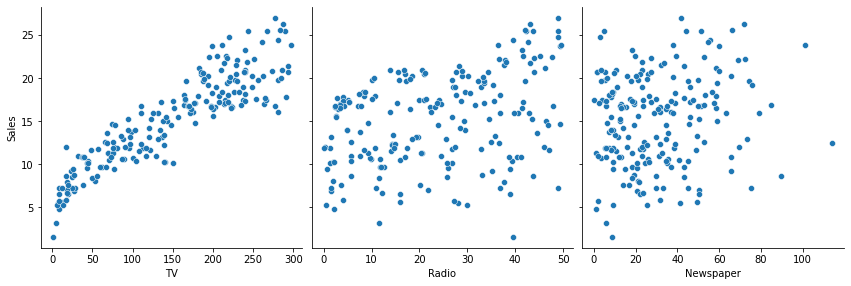

In [93]:
#creating a pair plot
sns.pairplot(data =ad,  x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='scatter', height =4)
plt.show()

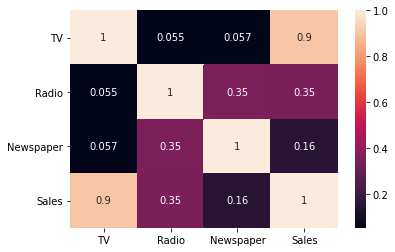

In [94]:
# heatmap of correlation
sns.heatmap(ad.corr(), annot = True)

Let's perform simple linear regression using TV as our feature variable

In [95]:
# assigning TV to X variable and Sales to y variable
X = ad['TV']
y = ad['Sales']

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state =100)

In [97]:
X_train.shape

(140,)

In [127]:
X_test.shape

(60,)

####  Linear Regression using SKLearn

In [115]:
print(X_train.shape)

(140,)


In [116]:
print(y_train.shape)

(140,)


In [117]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [118]:
print(X_train_lm.shape)
print(y_train.shape)
print(X_test_lm.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [119]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

lr.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
print(lr.intercept_)
print(lr.coef_)

6.948683200001357
[0.05454575]


So the equation of 
#### Sales = 6.9487 + TV x0.0545.

#### Residual analysis

In [121]:
y_train_pred = lr.predict(X_train_lm)
res = (y_train- y_train_pred) 

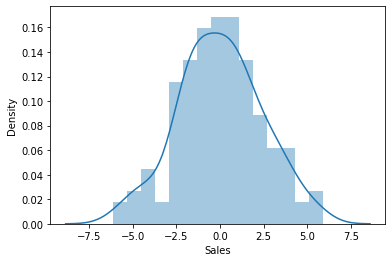

In [122]:
fig = plt.figure()
sns.distplot(res, bins = 15)

In [123]:
# r2_score on train data
r2_score(y_train, y_train_pred)

0.8157933136480389

#### Predictions on test data:

In [124]:
y_pred = lr.predict(X_test_lm)

In [125]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

2.019296008966231

RMSE value also remains same.

In [126]:
# r2 square
r2_score(y_test, y_pred)

0.7921031601245662

Our Train data had R- squared value of 81.6% where as test data has 79.21%, which is a pretty decent model.